In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/24 21:31:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/24 21:31:35 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [6]:
from pyspark.ml.clustering import KMeans

In [19]:
import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('data/subset.csv')
data = spark.createDataFrame(df)
data

DataFrame[abbreviated_product_name: double, cities: double, allergens_en: double, serving_quantity: double, additives_n: double, additives: double, nutriscore_score: double, nova_group: double, ecoscore_score: double, product_quantity: double, owner: double, unique_scans_n: double, completeness: double, last_image_t: double, energy-kj_100g: double, energy-kcal_100g: double, energy_100g: double, energy-from-fat_100g: double, fat_100g: double, saturated-fat_100g: double, butyric-acid_100g: double, caproic-acid_100g: double, caprylic-acid_100g: double, capric-acid_100g: double, lauric-acid_100g: double, myristic-acid_100g: double, palmitic-acid_100g: double, stearic-acid_100g: double, arachidic-acid_100g: double, behenic-acid_100g: double, lignoceric-acid_100g: double, cerotic-acid_100g: double, montanic-acid_100g: double, melissic-acid_100g: double, unsaturated-fat_100g: double, monounsaturated-fat_100g: double, polyunsaturated-fat_100g: double, omega-3-fat_100g: double, alpha-linolenic-

In [23]:
from pyspark.ml.feature import VectorAssembler
  
vec_assembler = VectorAssembler(inputCols=data.columns,
                                outputCol='features')
  
final_data = vec_assembler.transform(data)
final_data.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|(132,[12,13,15,16...|
|(132,[12,13,18,19...|
|(132,[6,8,9,12,13...|
|(132,[12,13,15,16...|
|(132,[9,12,13],[1...|
+--------------------+
only showing top 5 rows



In [24]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,15):
    KMeans_algo=KMeans(k=i)    
    KMeans_fit=KMeans_algo.fit(final_data)
    output=KMeans_fit.transform(final_data)

    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    
    print(f"Silhouette at {i}: {score:.3f}")

Silhouette at 2: 0.998
Silhouette at 3: 0.873
Silhouette at 4: 0.826
Silhouette at 5: 0.826
Silhouette at 6: 0.798
Silhouette at 7: 0.814
Silhouette at 8: 0.799
Silhouette at 9: 0.791
Silhouette at 10: 0.793
Silhouette at 11: 0.789
Silhouette at 12: 0.777
Silhouette at 13: 0.794
Silhouette at 14: 0.774


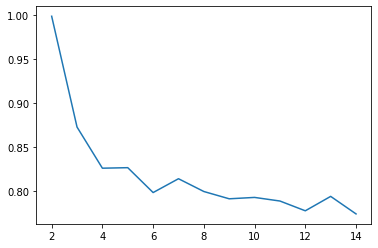

In [27]:
plt.plot(list(range(2, 15)), silhouette_score)

In [31]:
KMeans_algo=KMeans(k=7)    
KMeans_fit=KMeans_algo.fit(final_data)
output=KMeans_fit.transform(final_data)

In [53]:
preds = output.select('prediction').collect()
preds = list(map(lambda item: item.asDict()['prediction'], preds))